In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path

sys.path.extend(['/Users/nkinsky/Documents/UM/GitHub/NeuroPy/'])  # Add path to NeuroPy repository here
sys.path.extend(['/data/GitHub/NeuroPy/'])

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
import neuropy.io.openephysio as oeio
from neuropy.core.epoch import Epoch


In [55]:
# dir_use = Path("/Users/nkinsky/Documents/UM/Working/Trace_FC/Recording_Rats/Finn/2022_01_20_training")
dir_use = Path("/data2/Trace_FC/Recording_Rats/Finn/2022_01_20_training/")

# Create sync_df to ID start and end of each recording in concatenated .eeg file
sync_df = oeio.create_sync_df(dir_use)

# Get absolute time from start of first recording
sync_df['Tabs from start (s)'] = (sync_df['Datetime'] - sync_df['Datetime'].iloc[0]).dt.total_seconds()
sync_df

start time = 2022-01-20 12:28:41.457273-05:00
start time = 2022-01-20 12:41:05.080921-05:00
start time = 2022-01-20 12:49:07.058155-05:00
start time = 2022-01-20 13:11:28.552226-05:00
start time = 2022-01-20 13:23:42.352374-05:00
start time = 2022-01-20 15:04:44.374794-05:00
start time = 2022-01-20 15:52:30.413963-05:00
start time = 2022-01-20 17:13:53.545696-05:00


,Recording,Datetime,Condition,nframe_dat,dat_time,nframe_eeg,eeg_time,Tabs from start (s)
0,0,2022-01-20 12:28:41.457273-05:00,start,0,0.000000,0,0.0000,0.000000
1,0,2022-01-20 12:39:17.984173-05:00,stop,19095807,636.526900,795658,636.5264,636.526900
2,1,2022-01-20 12:41:05.080921-05:00,start,19095808,636.526933,795659,636.5272,743.623648
3,1,2022-01-20 12:47:18.132621-05:00,stop,30287359,1009.578633,1261973,1009.5784,1116.675348
4,2,2022-01-20 12:49:07.058155-05:00,start,30287360,1009.578667,1261974,1009.5792,1225.600882
5,2,2022-01-20 13:11:05.790921667-05:00,stop,69849343,2328.311433,2910389,2328.3112,2544.333649
6,3,2022-01-20 13:11:28.552226-05:00,start,69849344,2328.311467,2910390,2328.3120,2567.094953
7,3,2022-01-20 13:20:11.073792667-05:00,stop,85524991,2850.833033,3563541,2850.8328,3089.616520
8,4,2022-01-20 13:23:42.352374-05:00,start,85524992,2850.833067,3563542,2850.8336,3300.895101
9,4,2022-01-20 15:04:09.641940667-05:00,stop,266343679,8878.122633,11097653,8878.1224,9328.184668


In [3]:
# Load in ALL TTLs
ttl_chan_use = 1
ttl_df = oeio.load_all_ttl_events(dir_use)
ttl_df = ttl_df[ttl_df.channel_states.abs() == ttl_chan_use]
ttl_df.head(5)

,channel_states,timestamps,datetimes,sample_number,event_name,Recording
0,-1,1381681,2022-01-20 12:29:27.513306333-05:00,1381681,,0
1,1,1382665,2022-01-20 12:29:27.546106333-05:00,1382665,,0
2,-1,1383645,2022-01-20 12:29:27.578773-05:00,1383645,,0
3,1,1384681,2022-01-20 12:29:27.613306333-05:00,1384681,,0
4,-1,1385668,2022-01-20 12:29:27.646206333-05:00,1385668,,0


In [27]:
# Load in miniscope timestamps
MIO = MiniscopeIO(dir_use)
MIO.load_all_timestamps(tz="America/Detroit", return_corrupt_times=True)

MIO.times_all

Eliminating 982 timestamps from corrupted video 18 in 12_49_22 folder.


,Frame Number,Time Stamp (ms),Buffer Index,Timestamps,Recording,Corrupt
0,0,-30,0,2022-01-20 12:29:27.437000-05:00,0,False
1,1,34,0,2022-01-20 12:29:27.501000-05:00,0,False
2,2,44,0,2022-01-20 12:29:27.511000-05:00,0,False
3,3,72,0,2022-01-20 12:29:27.539000-05:00,0,False
4,4,105,0,2022-01-20 12:29:27.572000-05:00,0,False
...,...,...,...,...,...,...
6691,6691,450774,0,2022-01-20 17:27:27.661000-05:00,21,False
6692,6692,450840,0,2022-01-20 17:27:27.727000-05:00,21,False
6693,6693,450907,0,2022-01-20 17:27:27.794000-05:00,21,False
6694,6694,450975,0,2022-01-20 17:27:27.862000-05:00,21,False


In [17]:
# Get start times of each miniscope video
ms_start_df = MIO.get_rec_starts()
ms_start_df

,Frame Number,Time Stamp (ms),Buffer Index,Timestamps,Recording
1,1,34,0,2022-01-20 12:29:27.501000-05:00,0
1,1,29,0,2022-01-20 12:43:18.237000-05:00,1
1,1,17,0,2022-01-20 12:49:22.664000-05:00,2
1,1,40,0,2022-01-20 13:12:04.005000-05:00,3
1,1,88,0,2022-01-20 13:25:07.804000-05:00,4
1,1,31,0,2022-01-20 13:29:30.960000-05:00,5
1,1,36,0,2022-01-20 13:39:51.917000-05:00,6
1,1,57,0,2022-01-20 14:00:04.723000-05:00,7
1,1,3,0,2022-01-20 14:07:23.220000-05:00,8
1,1,52,0,2022-01-20 14:21:38.383000-05:00,9


In [18]:
## Test code for below!

# # Identify start TTL!
# buffer_sec = 1 # time buffer in seconds for start / stop
# ms_sr = 15
# oe_sr = 30000
# buffer_td = pd.Timedelta(buffer_sec, unit="sec")
# ms_rec_num = 1

# # First grab timestamp for miniscope recording start
# # ms_start_ts = ms_start_df.iloc[0]["Timestamps"]
# ms_start_ts = ms_start_df[ms_start_df.Recording == ms_rec_num].iloc[0]["Timestamps"]

# # Next ID ephys recording start
# rec_bool = ((sync_df[sync_df.Condition == "start"]["Datetime"] - buffer_td)  < ms_start_ts).values & ((sync_df[sync_df.Condition == "stop"]["Datetime"] + buffer_td) > ms_start_ts).values
# oe_rec_num_use = sync_df[sync_df.Condition == "start"][rec_bool]["Recording"].iloc[0]
# oe_rec_num_use

# # Grab ttls from specific recording
# ttl_rec = ttl_df[ttl_df.Recording == oe_rec_num_use]

# start_ind = np.where((ttl_rec["timestamps"].diff() > (buffer_sec * oe_sr)) |  np.isnan(ttl_rec["timestamps"].diff()))[0]
# assert len(start_ind) == 1, "multiple candidate start times found in OE TTLs, adjust buffers and try again"
# start_ttl = ttl_rec.iloc[start_ind[0]]

# # Print stuff to screen as sanity check
# print(f"MS start = {ms_start_ts}")
# print(f"Corresponding TTL time in OE = {start_ttl['datetimes']}")
# start_delta = start_ttl['datetimes'] - ms_start_ts 

# prior_oe_rec_start_dt = sync_df[(sync_df.Recording == oe_rec_num_use) & (sync_df.Condition == "start")].iloc[0]["Datetime"]
# ms_start_dt = MIO.times_all[MIO.times_all.Recording == ms_rec_num]["Timestamps"]
# prior_oe_rec_start_comb_time = sync_df[(sync_df.Recording == oe_rec_num_use) & (sync_df.Condition == "start")].iloc[0]["eeg_time"]
# ms_times_eeg_align = (ms_start_dt + start_delta - prior_oe_rec_start_dt).dt.total_seconds() + prior_oe_rec_start_comb_time
# ms_times_eeg_align


# # Need to chop any frames happening after OE recording stops!


MS start = 2022-01-20 12:43:18.237000-05:00
Corresponding TTL time in OE = 2022-01-20 12:43:18.287954333-05:00


0        769.643233
1        769.734233
2        769.780233
3        769.846233
4        769.912233
           ...     
3515    1006.746233
3516    1006.815233
3517    1006.882233
3518    1006.949233
3519    1007.016233
Name: Timestamps, Length: 3520, dtype: float64

In [46]:
buffer_sec = 1 # time buffer in seconds for start / stop
ms_sr = 15
oe_sr = 30000
buffer_td = pd.Timedelta(buffer_sec, unit="sec")

ms_times_df = []
for ms_rec_num in ms_start_df.Recording.values:
# for ms_rec_num in [5]:
    
    # First grab timestamp for miniscope recording start
    ms_start_ts = ms_start_df[ms_start_df.Recording == ms_rec_num].iloc[0]["Timestamps"]
    
    # Next ID ephys recording start based on closest TTL to start
    rec_bool = ((sync_df[sync_df.Condition == "start"]["Datetime"] - buffer_td)  < ms_start_ts).values & ((sync_df[sync_df.Condition == "stop"]["Datetime"] + buffer_td) > ms_start_ts).values
    oe_rec_num_use = sync_df[sync_df.Condition == "start"][rec_bool]["Recording"].iloc[0]
    oe_rec_num_use
    
    # Grab ttls from specific recording
    ttl_rec = ttl_df[ttl_df.Recording == oe_rec_num_use]
    
    oe_start_inds = np.where((ttl_rec["timestamps"].diff() > (buffer_sec * oe_sr)) |  np.isnan(ttl_rec["timestamps"].diff()))[0]
    start_ind = oe_start_inds[np.where((ttl_rec.iloc[oe_start_inds]["datetimes"] - ms_start_ts).dt.total_seconds().abs() < buffer_sec)[0]]
    assert len(start_ind) == 1, "multiple candidate start times found in OE TTLs, adjust buffers and try again"
    start_ttl = ttl_rec.iloc[start_ind[0]]
    
    # Print stuff to screen as sanity check
    # print(f"MS start = {ms_start_ts}")
    # print(f"Corresponding TTL time in OE = {start_ttl['datetimes']}")

    # Calculate delta between miniscope time start and ttl received in OE
    start_delta = start_ttl['datetimes'] - ms_start_ts 
    # print(f"start_delta_sec={start_delta.total_seconds()}")

    # Now adjust each timestamp in miniscope timestamps by start offset from OE TTL 
    prior_oe_rec_start_dt = sync_df[(sync_df.Recording == oe_rec_num_use) & (sync_df.Condition == "start")].iloc[0]["Datetime"]
    ms_rec_df = MIO.times_all[MIO.times_all.Recording == ms_rec_num]
    prior_oe_rec_start_comb_time = sync_df[(sync_df.Recording == oe_rec_num_use) & (sync_df.Condition == "start")].iloc[0]["eeg_time"]
    ms_times_eeg_align = pd.DataFrame((ms_rec_df["Timestamps"] + start_delta - prior_oe_rec_start_dt).dt.total_seconds() + prior_oe_rec_start_comb_time)
    
    # Save recording number, corrupt frame boolean, if frame was in the buffer before hitting record, and then shift
    # any pre-recording buffered frames to have negative indices
    ms_times_eeg_align["Recording"] = ms_rec_num
    ms_times_eeg_align["Corrupt"] = ms_rec_df["Corrupt"]
    ms_times_eeg_align["Pre_rec_buffer"] = ms_rec_df["Time Stamp (ms)"] < 0
    n_pre_buffer = (ms_rec_df["Time Stamp (ms)"] < 0).sum()
    ms_times_eeg_align = ms_times_eeg_align.set_index(ms_times_eeg_align.index - n_pre_buffer)
    
    ms_times_df.append(ms_times_eeg_align)

# Get output times of all miniscope timestamps now referenced to the eeg time.
ms_ts_align_df = pd.concat(ms_times_df, axis=0)
ms_ts_align_df

,Timestamps,Recording,Corrupt,Pre_rec_buffer
-1,45.992033,0,False,True
0,46.056033,0,False,False
1,46.066033,0,False,False
2,46.094033,0,False,False
3,46.127033,0,False,False
...,...,...,...,...
6690,17263.264833,21,False,False
6691,17263.330833,21,False,False
6692,17263.397833,21,False,False
6693,17263.465833,21,False,False


In [47]:
# Create a dataframe for the start and stop time of each recording in EEG time. 
ms_starts = ms_ts_align_df.loc[0]["Timestamps"].values
ms_stops = np.hstack((ms_ts_align_df[(ms_ts_align_df["Timestamps"].diff(-1) < - buffer_sec)]["Timestamps"].values, 
                       ms_ts_align_df.iloc[-1]["Timestamps"]))

ms_rec_epochs = Epoch(pd.DataFrame({"start": ms_starts, "stop": ms_stops, "label": "ms_rec_after_align"}))
ms_rec_epochs

22 epochs
Snippet: 
          start         stop               label
0    46.056033   450.253033  ms_rec_after_align
1   769.734233  1007.016233  ms_rec_after_align
2  1025.254367  2304.090367  ms_rec_after_align
3  2363.853400  2660.248400  ms_rec_after_align
4  2936.337533  2983.143533  ms_rec_after_align

In [ ]:
# Rule for start - diff = nan or diff > thresh
# rule for stop: diff(-1) < -thresh
# chuck any that have same start and stop?

In [49]:
# Construct time epochs of miniscope recordings from TTL series. Assumes delta between timestamps from TTLs > ttl_rec_thresh
ttl_rec_thresh = 1  # Any TTLs greater than this # seconds apart will be considered from a separate recording
rec_label = "miniscope_from_ttl"
sr_ttl = 30000

# Get absolute time from first recording start for each TTL - will chop out other isolated TTLs (noise) that occur
## Rule for start - diff = nan or diff > thresh
## Rule for stop: diff(-1) < -thresh
dt_ttl_sec = (ttl_df["datetimes"] - sync_df.iloc[0]["Datetime"]).dt.total_seconds()
rec_start_inds = np.where((dt_ttl_sec.diff() > ttl_rec_thresh) | np.isnan(dt_ttl_sec.diff()))[0]
rec_stop_inds = np.where((dt_ttl_sec.diff(-1) < -ttl_rec_thresh) | np.isnan(dt_ttl_sec.diff(-1)))[0]

# Interpolate start and stop back to combined recording time
rec_start_t_comb = np.interp(dt_ttl_sec.iloc[rec_start_inds].values, sync_df["Tabs from start (s)"], sync_df["eeg_time"])
rec_stop_t_abs = np.interp(dt_ttl_sec.iloc[rec_stop_inds].values, sync_df["Tabs from start (s)"], sync_df["eeg_time"])
# rec_stop_inds = np.hstack((rec_stop_inds, ttl_df.shape[0] - 1))

rec_epochs_from_ttl = Epoch(pd.DataFrame({"start": rec_start_t_comb, "stop": rec_stop_t_abs, "label": rec_label}))

rec_ttl_align_df = []
zero_length_bool = (rec_stop_inds - rec_start_inds) == 0  # Chop out any isolated TTLs
for idr, (start_ind, stop_ind) in enumerate(zip(rec_start_inds[~zero_length_bool], 
                                                rec_stop_inds[~zero_length_bool])):
    rec_ttl_times_use = np.interp(dt_ttl_sec.iloc[start_ind:stop_ind].values, sync_df["Tabs from start (s)"], sync_df["eeg_time"])
    rec_ttl_align_df.append(pd.DataFrame({"ttl_sec_from_eeg_start": rec_ttl_times_use, "Recording": idr}))
rec_ttl_align_df = pd.concat(rec_ttl_align_df, axis=0)

# print(rec_start_inds)
# print(rec_stop_inds)
rec_epochs_from_ttl

[     0  12030  15555  34537  34538  38939  38940  38941  39638  44108
  56414  60867  65761  72793  76485  79395  84828  88551  89292  91468
  95941 106978 111487 114839 120411]
[ 12029  15554  34536  34537  38938  38939  38940  39637  44107  56413
  60866  65760  72792  76484  79394  84827  88550  89291  91467  95940
 106977 111486 114838 120410 127106]


25 epochs
Snippet: 
          start         stop               label
0    46.055997   450.313313  miniscope_from_ttl
1   769.734055  1007.105970  miniscope_from_ttl
2  1025.254358  2304.156147  miniscope_from_ttl
3  2341.883313  2341.883313  miniscope_from_ttl
4  2363.853348  2660.317913  miniscope_from_ttl

### Sanity checks
Print out # frames you expect and check to see if any don't match

In [56]:
# Total # frames in miniscope data
np.load(dir_use / "Miniscope_combined/minian/C.npy").shape

(55, 125447)

In [57]:
# total number frames including corrupt frames
np.load(dir_use / "Miniscope_combined/minian/good_frames_bool.npy").shape

(126117,)

In [72]:
nframes_ttl, nframes_ms = [], []
for nrec in rec_ttl_align_df.Recording.unique():
    nframes_ttl.append((rec_ttl_align_df.Recording == nrec).sum())
    nframes_ms.append((ms_ts_align_df[~ms_ts_align_df.Pre_rec_buffer].Recording == nrec).sum())
nframes_ttl = np.array(nframes_ttl)
nframes_ms = np.array(nframes_ms)

mismatches = np.where((nframes_ttl - nframes_ms) != 0)[0]
print(f"Mismatched #frames in MS recordings # {mismatches}")

Mismatched #frames in MS recordings # [1]


## Investigate dropped frames here - will vary for each sessions

Example here illustrates how to identify shifts in timestamps offsets.

In [123]:
mismatch_rec = 1
ttl_mismatch = rec_ttl_align_df[rec_ttl_align_df.Recording == mismatch_rec]
ms_ts_mismatch = ms_ts_align_df[(ms_ts_align_df.Recording == mismatch_rec) & ~ms_ts_align_df.Pre_rec_buffer]
nframes_min = np.min((ttl_mismatch.shape[0], ms_ts_mismatch.shape[0]))
diffs = ttl_mismatch["ttl_sec_from_eeg_start"].iloc[0:nframes_min].values - ms_ts_mismatch['Timestamps'].iloc[0:nframes_min].values
diffs

array([-1.78536961e-04,  2.02213740e-02,  2.07546189e-02, ...,
       -3.15995963e-01, -3.14562721e-01, -3.14829477e-01])

In [173]:
# Get miniscope sample rate
from neuropy.io.miniscopeio import get_recording_metadata
import re

rec_metadata, vid_metadata, _ = get_recording_metadata("/data2/Trace_FC/Recording_Rats/Finn/2022_01_20_training/2_training/Finn/gobears/2022_01_20/12_49_22")
sr_spec = 1 / float(re.sub("FPS", "", vid_metadata['frameRate']))
print(f"SR specified = {sr_spec}")

SR specified = 0.06666666666666667


In [171]:
# Calculate effective sample rate, make sure it matches above
ms_rec = ms_ts_align_df[(ms_ts_align_df.Recording == mismatch_rec) & ~ms_ts_align_df.Pre_rec_buffer]
sr_actual = ms_rec.Timestamps.diff().mean()
print(f"SR actual = {sr_actual}")

SR actual = 0.06744798180784535


Approximate dropped frame locations at [2455 2657]


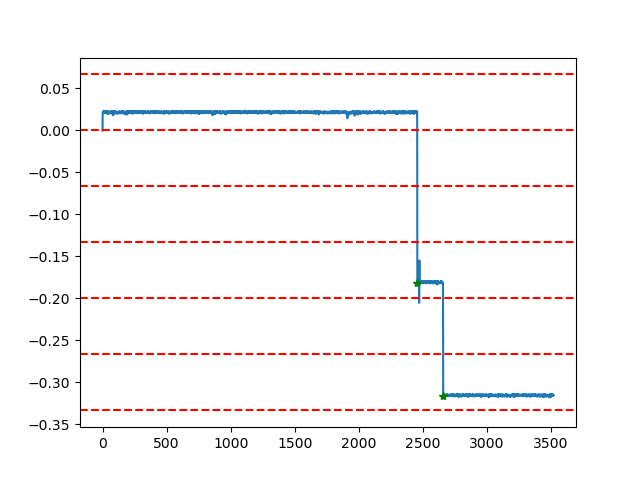

In [148]:
# Plot differences between timestamps and overlay miniscope sampling rate intervals to identify missing frames!
# Every time it jumps a box below you have a missing frame
%matplotlib widget
_, ax = plt.subplots()
ax.plot(diffs)
for sr_interval in np.arange(np.floor(np.min(diffs) / sr_spec), np.ceil(np.max(diffs) / sr_spec) + 1, 1):
    ax.axhline(sr_interval*sr_spec, color='r', linestyle='--')

drop_bool = np.abs(np.diff(diffs)) > sr_spec
drop_inds = np.where(drop_bool)[0]
ax.plot(drop_inds, diffs[:-1][drop_inds + 1], 'g*')

print(f"Approximate dropped frame locations at {drop_inds}")

# NRK pick up here
Will need to insert a boolean into the TTL df for dropped frames at the appropriate recording, then clip those out and plot the differences between timestamps to check (both in the main recording AND across the whole recording).
- Also should output approximate slop in aligning the data, which is the mean difference between timestamps after alignment - not clear if that is due to hardware lag or actual capture times.

/tmp/ipykernel_512006/3260544241.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


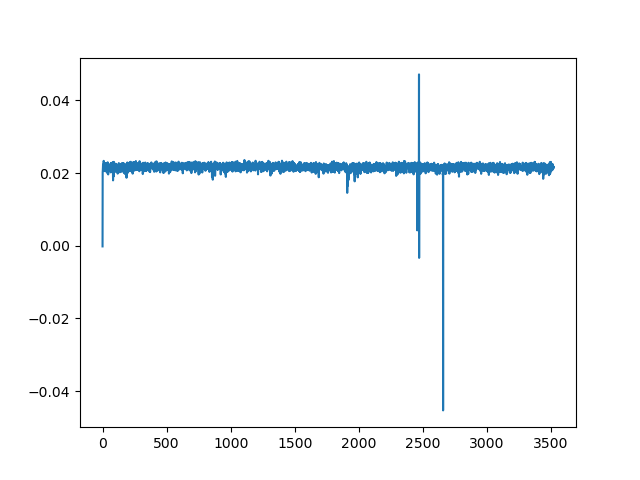

In [170]:
# Now play around below to identify indices to drop - should have everything around the same time difference
dropped_inds = [2456, 2457, 2458, 2661, 2662]
ttl_clipped = ttl_mismatch.drop(index=dropped_inds)
diffs_fixed = ttl_clipped["ttl_sec_from_eeg_start"].values - ms_ts_mismatch["Timestamps"].values
_, ax = plt.subplots()
ax.plot(diffs_fixed)

In [152]:
# Chop out 2456:2458 and 2658:2659
ttl_mismatch.iloc[2453:2460]

,ttl_sec_from_eeg_start,Recording
2453,935.011533,1
2454,935.078867,1
2455,935.128466,1
2456,935.145466,1
2457,935.213266,1
2458,935.281000,1
2459,935.347599,1


In [150]:
ms_ts_mismatch.iloc[2453:2458]

,Timestamps,Recording,Corrupt,Pre_rec_buffer
2453,934.990233,1,False,False
2454,935.056233,1,False,False
2455,935.124233,1,False,False
2456,935.327233,1,False,False
2457,935.393233,1,False,False


In [153]:
ttl_mismatch.iloc[2658:2661]

,ttl_sec_from_eeg_start,Recording
2658,948.756715,1
2659,948.823215,1
2660,948.890948,1


In [154]:
ms_ts_mismatch.iloc[2658:2661]

,Timestamps,Recording,Corrupt,Pre_rec_buffer
2658,949.073233,1,False,False
2659,949.139233,1,False,False
2660,949.207233,1,False,False


In [130]:
np.arange(-5, 1, 1)

array([-5, -4, -3, -2, -1,  0])

In [128]:
np.ceil(np.max(diffs) / sr_spec)

1.0

In [129]:
np.floor(np.min(diffs) / sr_spec)

-5.0

In [91]:
np.max(np.abs(diffs))

0.3178930732567551

In [85]:
ttl_mismatch["ttl_sec_from_eeg_start"].iloc[0:nframes_min + 1]

0        769.734055
1        769.800455
2        769.866988
3        769.934355
4        770.002554
           ...     
3515    1006.499071
3516    1006.566237
3517    1006.634671
3518    1006.701404
3519    1006.768404
Name: ttl_sec_from_eeg_start, Length: 3520, dtype: float64

In [86]:
ms_ts_mismatch['Timestamps'].iloc[0:nframes_min + 1]

0        769.734233
1        769.780233
2        769.846233
3        769.912233
4        769.980233
           ...     
3514    1006.746233
3515    1006.815233
3516    1006.882233
3517    1006.949233
3518    1007.016233
Name: Timestamps, Length: 3519, dtype: float64

In [ ]:
rec_epochs_from_ttl[rec_epochs_from_ttl.durations > 0]

In [73]:
ms_rec_epochs.durations - rec_epochs_from_ttl[rec_epochs_from_ttl.durations > 0].durations

array([-0.06031578, -0.08991518, -0.06578982, -0.06956501, -0.08739404,
       -0.07032837, -0.06932787, -0.06999518, -0.07022473, -0.06803974,
       -0.0693017 , -0.07007507, -0.06875651, -0.07007884, -0.07024258,
       -0.06924364, -0.06955266, -0.07034985, -0.06865228, -0.0665312 ,
       -0.0683077 , -0.0675693 ])

In [ ]:
import neuropy.plotting.epochs as plt_epochs
_, ax = plt.subplots(2, 1, sharex=True)
plt_epochs.plot_epochs(rec_epochs_from_ttl[rec_epochs_from_ttl.durations > 0], ax=ax[0])
plt_epochs.plot_epochs(ms_rec_epochs, ax=ax[1])

In [ ]:
ms_rec_epochs

In [ ]:
rec_epochs_from_ttl[rec_epochs_from_ttl.durations > 0]

## NRK todo - align EACH TTL to the other TTLS, and count to identify missing / dropped frames!

In [ ]:
# Step through and check for dropped frames


In [ ]:
%matplotlib widget
_, ax = plt.subplots()
ax.plot(dt_ttl_sec.values)

In [ ]:
# Make miniscope epochs 
oe_rec_start = 
for idr in ms_start_df.Recording.values:
ms_start_df

In [ ]:
ttl_dt_df = pd.DataFrame((ttl_df['datetimes'] - sync_df.iloc[0]['Datetime']).dt.total_seconds().reset_index(drop=True)).rename(columns={"datetimes": "t_from_eeg_start"})

In [ ]:
_, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(MIO.times_all["Time Stamp (ms)"].diff().values[MIO.times_all["Time Stamp (ms)"].diff().values > 0])
MIO.times_all["Time Stamp (ms)"].diff().values

ax[1].plot(ttl_dt_df.t_from_eeg_start.diff().values*1000)


In [ ]:

start_inds = np.where((MIO.times_all["Time Stamp (ms)"].diff() > (1000 * buffer_sec)) | np.isnan(MIO.times_all["Time Stamp (ms)"].diff()))[0]
assert len(start_ind) == 1, "multiple candidate start times found"

## General approach
3 situations:
1) No TTLs, using only timestamps to align.
2) TTLs for start only (e.g. Motive).
3) TTLs for all events (e.g. miniscope timestamps).  
``# 2 and # 3 are fundamentally the same``

Stages:
1) Get sync_df to identify timestamps for the start and end of each ephys recording
2) Get times for all TTLs in seconds since start of combined ephys file

Better!
- write function for each type of alignment below:
- - miniscope frames to OE TTLs (assumes that each index == 0 is the start of a new recording): `align_by_TTL_series`
  - motive start to TTL in OE: `align_by_TTL_start`
  - `align_by_timestamps` for data with no TTL
- then write a notebook with a general template for aligning miniscope time stamps, motive starts + timestamps afterward, and generic timestamps (e.g. CS start / stop from TraceFC experiment)

# Test `alignment_util` functions

In [ ]:
# Set up situation where you have identical data in both the ephys and position tracking system, but one is started after the other
from neuropy.utils.align_util import align_data
%matplotlib notebook

# Set up 1 Hz sine wave for both
SRlfp, SRpos = 1250, 25
tstart = pd.Timestamp.now()
frames = np.arange(0,10*60*SRlfp)
t_ephys = pd.Series(tstart + (frames/SRlfp*10**9).astype(np.timedelta64))
data_ephys = np.sin(2*np.pi*frames/SRlfp)

# Now copy data over to position tracking system, started 2 sec after and only staying on for 6 seconds
tpos_start_second = t_ephys[slice(0, None, int(SRlfp/SRpos))][2*SRpos:8*SRpos]
data_pos_start_second = data_ephys[slice(0, None, int(SRlfp/SRpos))][2*SRpos:8*SRpos]

# Plot lfp data
fig, ax = plt.subplots()
fig.set_size_inches([6, 3])
ax.plot(t_ephys, data_ephys)
ax.set_xlim([t_ephys.iloc[0], t_ephys.iloc[10*SRlfp]])  # zoom into first 10 seconds

# Now align position data to ephys data
time_aligned, data_aligned = align_data(t_ephys, tpos_start_second, data_pos_start_second)
ax.plot(time_aligned, data_aligned, 'r--')

Ok, that looks good. Now let's test if we have some offset in timestamps due to start time inaccuracy of the position system, but we sent a TTL to the ephys system when we started the position tracking system.

In [ ]:
## First, ID TTL time as start of position tracking
TTLtime = tpos_start_second.iloc[0]

## offset times in position data by 0.25 seconds
tpos_start_second_jitter = tpos_start_second + pd.Timedelta(0.25, unit='sec')

# First, align times by timestamps as usual
time_aligned_direct, data_aligned_direct = align_data(t_ephys, tpos_start_second_jitter, data_pos_start_second)

# Now align times by TTLtime in ephys system
time_alignedTTL, data_alignedTTL = align_data(t_ephys, tpos_start_second_jitter, data_pos_start_second,
                                       t_align_ref=TTLtime, t_align_data='start')

# First plot jittered data directly aligned by timestamps
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches([6, 6])
fig.suptitle('Pos data (red) start time off by 0.25 seconds')
ax[0].plot(t_ephys, data_ephys)
ax[0].set_xlim([t_ephys.iloc[0], t_ephys.iloc[10*SRlfp]])  # zoom into first 10 seconds
ax[0].plot(time_aligned_direct, data_aligned_direct, 'r--')
ax[0].set_title('Aligned via timestamps directly')
ax[0].legend(['Ephys system', 'Position system aligned'])

# Now, plot jittered data aligned via TTL
ax[1].plot(t_ephys, data_ephys)
ax[1].plot(time_alignedTTL, data_alignedTTL, 'r--')
ax[1].set_title('Aligned via TTL from position system to ephys system')

sns.despine(fig=fig)


Now try the opposite - ephys system started AFTER position system.

In [ ]:
## offset times in position data by 3 seconds - position system now starts 1 second BEFORE ephys
tpos_start_first = tpos_start_second + pd.Timedelta(-3, unit='sec')

## Now introduce a 0.25 second start time inaccuracy
tpos_start_first_jitter = tpos_start_first + pd.Timedelta(-0.25, unit='sec')
data_pos_start_first = data_pos_start_second

##Last, ID TTL time as start of ephys which occurs 1 second after position starts
TTLtime = tpos_start_first_jitter.iloc[1*SRpos]

# First, align times by timestamps as usual
time_aligned_direct, data_aligned_direct = align_data(t_ephys, tpos_start_first_jitter, data_pos_start_first)

# Now align times by TTLtime in ephys system
time_alignedTTL, data_alignedTTL = align_data(t_ephys, tpos_start_first_jitter, data_pos_start_first,
                                       t_align_ref='start', t_align_data=TTLtime)

# First plot jittered data directly aligned by timestamps
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches([6, 6])
fig.suptitle('Pos data (red) start time off by 0.25 seconds')
ax[0].plot(t_ephys, data_ephys)
ax[0].set_xlim([t_ephys.iloc[0] - pd.Timedelta(2, unit='sec'), t_ephys.iloc[10*SRlfp]])  # zoom into first 10 seconds
ax[0].plot(time_aligned_direct, data_aligned_direct, 'r--')
ax[0].plot(tpos_start_first_jitter, data_pos_start_first, 'g-.')
ax[0].set_title('Aligned via timestamps directly')
ax[0].legend(['Ephys system', 'Position system aligned', 'All position data'])

# Now, plot jittered data aligned via TTL
ax[1].plot(t_ephys, data_ephys)
ax[1].plot(time_alignedTTL, data_alignedTTL, 'r--')
ax[1].set_title('Aligned via TTL from ephys system to position system')

sns.despine(fig=fig)


Sweet! Ok, now let's say we have a TTL from some OTHER system that goes to both the position and ephys system.

In [ ]:
# Assume we start the ephys system first, then the position system 2 seconds later, 
# then send a TTL 0.67 seconds after that.
TTLoe = t_ephys.iloc[int(2.66666666*SRlfp)]
TTLpos = tpos_start_second_jitter.iloc[int(0.66666666*SRpos)]

# First, align times by timestamps as usual
time_aligned_direct, data_aligned_direct = align_data(t_ephys, tpos_start_second_jitter, data_pos_start_second)

# Now align times by common TTL to both systems
time_alignedTTL, data_alignedTTL = align_data(t_ephys, tpos_start_second_jitter, data_pos_start_first,
                                       t_align_ref=TTLoe, t_align_data=TTLpos)

# First plot jittered data directly aligned by timestamps
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches([6, 6])
fig.suptitle('Pos data (red) start time off by 0.25 seconds')
ax[0].plot(t_ephys, data_ephys)
ax[0].set_xlim([t_ephys.iloc[0] - pd.Timedelta(2, unit='sec'), t_ephys.iloc[10*SRlfp]])  # zoom into first 10 seconds
ax[0].plot(time_aligned_direct, data_aligned_direct, 'r--')
ax[0].plot(tpos_start_second_jitter, data_pos_start_second, 'g-.')
ax[0].set_title('Aligned via timestamps directly')
ax[0].legend(['Ephys system', 'Position system aligned', 'All position data'])

# Now, plot jittered data aligned via TTL
ax[1].plot(t_ephys, data_ephys)
ax[1].plot(time_alignedTTL, data_alignedTTL, 'r--')
ax[1].set_title('Aligned via TTL from ephys system to position system')

sns.despine(fig=fig)

Ok, so things look pretty good! There is a super small offset for the last plot above, but it's on the order of SRpos, so there's not much you can do.